In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

%matplotlib inline

In [3]:
def get_pops(fname):
    
    data = open(fname, 'r').readlines()
    
    blank=0
    pops=[]
    for line in data:
        
        if line == '\n':
            blank+=1
            continue
                
        if blank==4:
            break
        
        if blank==3:
            pops.append(float(line.strip()))
            
        
    if 'microstate' in fname:
        pops += [0] * (100 - len(pops))
        
    '''        
    if len(data) == 116:
        pops = data[105:109]
    else:
        pops = data[105:205]
    
    for i in range(len(pops)):
        if pops[i] == '\n':
            pops[i] = float(0)
        else:
            pops[i] = float(pops[i].strip())
    '''
    return pops

In [4]:
def read_data(en_size, dur, iters):
    
    micros = glob('./dur-%s-ensemble-%s-iters-%s/microstate_info-*.txt'%(dur, en_size, iters))
    macros = glob('./dur-%s-ensemble-%s-iters-%s/macrostate_info-*.txt'%(dur, en_size, iters))
    
    micro_df = pd.DataFrame(columns=range(1,101), index=range(1, iters+1))
    macro_df = pd.DataFrame(columns=range(1,5), index=range(1, iters+1))
      
    for f in micros:
        it = int(f.split('/')[2].strip().split('-')[1].strip().split('.')[0])
        pops = get_pops(f)
        micro_df.loc[it] = pops
        
    for f in macros:
        it = int(f.split('/')[2].strip().split('-')[1].strip().split('.')[0])
        pops = get_pops(f)
        macro_df.loc[it] = pops
        
    return micro_df, macro_df

In [5]:
def plot(en_size, dur, iters):
    
    micro_df, macro_df = read_data(en_size, dur,iters)
    #print micro_df
    #print macro_df
    micro_ax = micro_df.plot(kind='line',marker='o',colormap='gist_rainbow', legend=False)
    micro_ax.set_xlabel('Iterations')
    micro_ax.set_ylabel('Fractional population')
    micro_ax.set_title('Fractional population of the microstates \n at each iteration - ensemble size=%s, dur=%s ns'%
                      (en_size, dur))
    micro_ax.set_xlim(0,iters+1)
    plt.savefig('./dur-%s-ensemble-%s-iters-%s/microstate-frac-pop.pdf'%(dur, en_size, iters))
    
    legendHandles = micro_ax.get_legend_handles_labels()
    a = plt.figure()
    a.legend(legendHandles[0],legendHandles[1],loc='center',ncol=4)
    a.canvas.draw()
    a.savefig('./dur-%s-ensemble-%s-iters-%s/microstate-legend.pdf'%(dur, en_size, iters),bbox_inches='tight')
    
    
    macro_ax = macro_df.plot(kind='line',marker='o',colormap='gist_rainbow')
    macro_ax.set_xlabel('Iterations')
    macro_ax.set_ylabel('Fractional population')
    macro_ax.set_xlim(0,iters+1)
    macro_ax.set_title('Fractional population of the macrostates \n at each iteration - ensemble size=%s, dur=%s ns'%
                      (en_size, dur))
    plt.savefig('./dur-%s-ensemble-%s-iters-%s/macrostate-frac-pop.pdf'%(dur, en_size, iters))

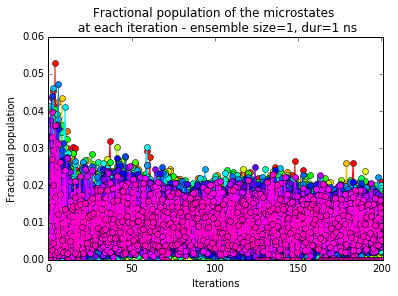

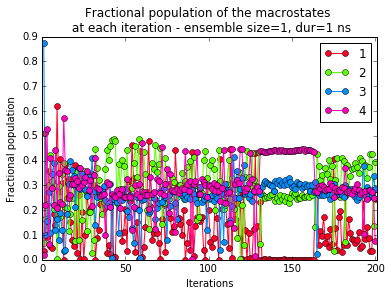

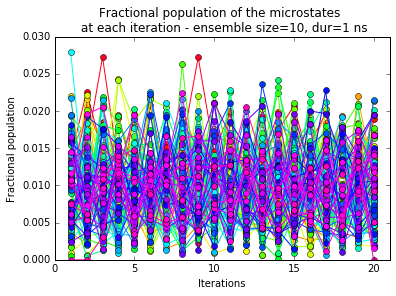

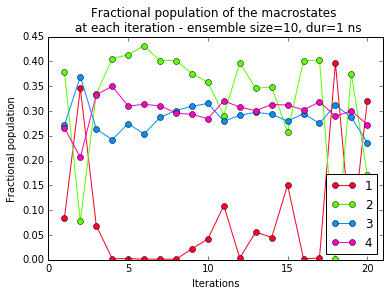

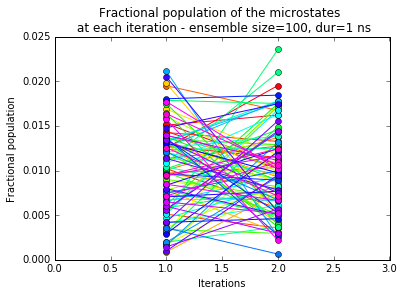

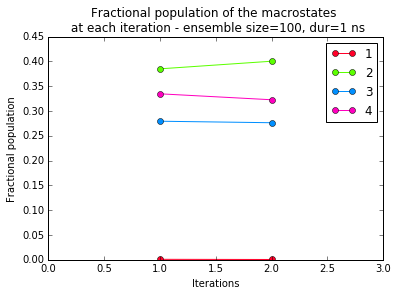

In [6]:
# Plot single iters
en_size = [1,10,100]
durs=[200,20,2]
iters=1

#for ind in range(len(en_size)):
#    plot(en_size[ind], durs[ind], iters)
    
    
# Plot single duration
en_size = [1,10,100]
durs=1
iters=[200,20,2]

for ind in range(len(en_size)):
    plot(en_size[ind], durs, iters[ind])